<a href="https://colab.research.google.com/github/tim-tmds/course-v3/blob/master/Oops_Tika_Lang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get install libmagickwand-dev
# !pip install wand
# !cat /etc/ImageMagick-6/policy.xml #edit: <policy domain="coder" rights="read|write" pattern="PDF" /> #uplaod to overwrite; then restart runtime

# I. Tesseract

## A. Monitor running ports

In [0]:
!sudo lsof -i -P -n | grep LISTEN

node         8 root   11u  IPv6  16012      0t0  TCP *:8080 (LISTEN)
jupyter-n   18 root    3u  IPv4  16077      0t0  TCP 172.28.0.2:9000 (LISTEN)
python3   1074 root   19u  IPv4  36726      0t0  TCP 127.0.0.1:38185 (LISTEN)
python3   1074 root   23u  IPv4  36730      0t0  TCP 127.0.0.1:49475 (LISTEN)
python3   1074 root   26u  IPv4  36734      0t0  TCP 127.0.0.1:42451 (LISTEN)
python3   1074 root   29u  IPv4  36738      0t0  TCP 127.0.0.1:32973 (LISTEN)
python3   1074 root   35u  IPv4  36743      0t0  TCP 127.0.0.1:38413 (LISTEN)
python3   1074 root   48u  IPv4  36964      0t0  TCP 127.0.0.1:57217 (LISTEN)


In [0]:
!sudo lsof -i -P -n | grep LISTEN

## B. Install tesseract-ocr and its python wrapper

In [0]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,650 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [0]:
!which tesseract

/usr/bin/tesseract


### 1. chinese language for ocr

In [0]:
!apt-get install tesseract-ocr-chi-sim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-chi-sim
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 1,636 kB of archives.
After this operation, 2,484 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-chi-sim all 4.00~git24-0e00fe6-1.2 [1,636 kB]
Fetched 1,636 kB in 1s (1,277 kB/s)
Selecting previously unselected package tesseract-ocr-chi-sim.
(Reading database ... 146392 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-chi-sim_4.00~git24-0e00fe6-1.2_all.deb ...
Unpacking tesseract-ocr-chi-sim (4.00~git24-0e00fe6-1.2) ...
Setting up tesseract-ocr-chi-sim (4.00~git24-0e00fe6-1.2) ...


### 2. add tesseract to path

In [0]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

### 3. sample usage: pytesseract

In [0]:
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [0]:
test_dir = '/content/drive/My Drive/TM Shared Files/5_DocAI/Picture to text/test_files/'
image_path_in_colab = test_dir+'eng_chi_quote_md.jpg'
# image_path_in_colab = '/content/eng_chi_quote_md.jpg'
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab), lang='eng+chi_sim')
print(extractedInformation)

你 存在 , 我 深 深 的 脑海 里 , 我 的 梦 里 , 我 的 心里 .

You exist, deep in my mind, in my dreams and in my heart.


### 4. sample usage: tesseract CLI

In [0]:
!tesseract '/content/drive/My Drive/TM Shared Files/5_DocAI/Picture to text/test_files/eng_chi_quote_md.jpg' out.txt -l eng+chi_sim

Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Estimating resolution as 203


# II. Tika

In [0]:
!pip install tika

  Created wheel for tika: filename=tika-1.24-cp36-none-any.whl size=32885 sha256=6d131d1ca7f774dfc852cf0d89f3817f724275c9da9998fc58a52d5f97ee8e64
  Stored in directory: /root/.cache/pip/wheels/73/9c/f5/0b1b738442fc2a2862bef95b908b374f8e80215550fb2a8975
Successfully built tika


In [0]:
# # Import PyDrive and associated libraries.
# # This only needs to be done once per notebook.
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once per notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# import os
# def single_file_download(save_path, file_id, filename):
#   local_download_path = os.path.expanduser(save_path)
#   try:
#     os.makedirs(local_download_path)
#   except: pass

#   fname = os.path.join(local_download_path, filename)
#   print('downloading to {}'.format(fname))
#   f_ = drive.CreateFile({'id': file_id})
#   f_.GetContentFile(fname)

In [0]:
# single_file_download("/content/pdf/", "17JggdFKI3vmNZQTnxhxnoiiknxiK1f6a", "sample.pdf")

In [0]:
from tika import parser

## A. Text-based pdf. No OCR

In [0]:
# %%writefile /etc/ImageMagick-6/policy.xml

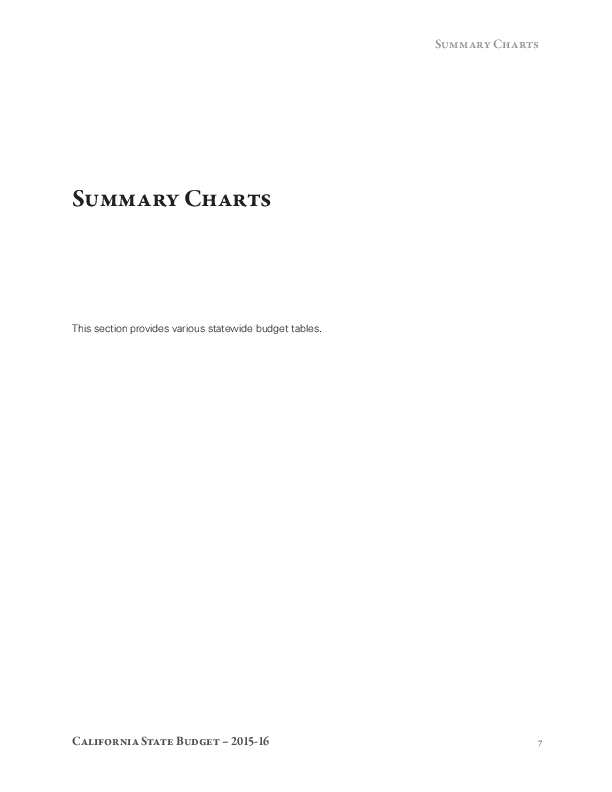

In [0]:
from wand.image import Image as WImage
img = WImage(filename=test_dir+'text_based_budget_free_table.pdf')
img

In [0]:
!pip install tika
from tika import parser
parsed_pdf = parser.from_file(test_dir+"text_based_budget_free_table.pdf")

In [0]:
parsed_pdf = parser.from_file(test_dir+"text_based_budget_free_table.pdf")

2020-05-15 05:59:16,167 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2020-05-15 05:59:16,741 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2020-05-15 05:59:17,169 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [0]:
parsed_pdf

{'content': '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n2015-16 State Budget\n\n\nSummary Charts\n\n7California State Budget – 2015-16\nrPkEiZiXFV\n\nThis section provides various statewide budget tables.\n\nSummary Charts\n\n\n\nCalifornia State Budget – 2015-16\n\nSummary Charts\n\n8\nrPkEiZiXFV\n\n2014-15 2015-16\nPrior Year Balance $5,589 $2,423\n\nRevenues and Transfers $111,307 $115,033\n\nTotal Resources Available $116,896 $117,456\n\nNon-Proposition 98 Expenditures $64,865 $65,953\n\nProposition 98 Expenditures $49,608 $49,416\n\nTotal Expenditures $114,473 $115,369\n\nFund Balance $2,423 $2,087\nReserve for Liquidation of Encumbrances $971 $971\nSpecial Fund for Economic Uncertainties $1,452 $1,116\n\nBudget Stabilization Account/Rainy Day Fund $1,606 $3,460\n\n.\n\nFigure SUM-01\n2015 Budget Act\n\nGeneral Fund Budget Summary\n(Dollars in Millions)\n\n \n\n\n\nSummary Charts\n\n9California State Budget – 2015-16\nrPkEiZ

In [0]:
print(parsed_pdf["content"].replace("\n\n", "\n"))


























2015-16 State Budget

Summary Charts
7California State Budget – 2015-16
rPkEiZiXFV
This section provides various statewide budget tables.
Summary Charts

California State Budget – 2015-16
Summary Charts
8
rPkEiZiXFV
2014-15 2015-16
Prior Year Balance $5,589 $2,423
Revenues and Transfers $111,307 $115,033
Total Resources Available $116,896 $117,456
Non-Proposition 98 Expenditures $64,865 $65,953
Proposition 98 Expenditures $49,608 $49,416
Total Expenditures $114,473 $115,369
Fund Balance $2,423 $2,087
Reserve for Liquidation of Encumbrances $971 $971
Special Fund for Economic Uncertainties $1,452 $1,116
Budget Stabilization Account/Rainy Day Fund $1,606 $3,460
.
Figure SUM-01
2015 Budget Act
General Fund Budget Summary
(Dollars in Millions)
 

Summary Charts
9California State Budget – 2015-16
rPkEiZiXFV
General
Fund
Special
Funds
Bond
Funds Totals
Legislative, Judicial, Executive $3,158 $3,408 $226 $6,792
Business, Consumer Services & Housing 627 807 140 1,574
T

## B. Image PDF

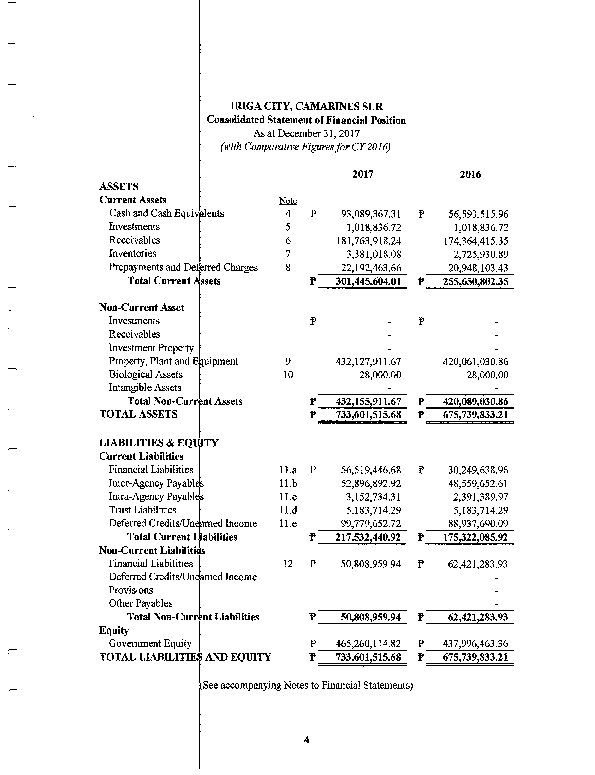

In [0]:
from wand.image import Image as WImage
img = WImage(filename=test_dir+'financial_statement_image_pdf_iriga.pdf')
img

### 1. No OCR


In [0]:
parsed_pdf2 = parser.from_file(test_dir+"financial_statement_image_pdf_iriga.pdf")
print(parsed_pdf2["content"].replace("\n\n", "\n"))






















Financial Statements











### 2. With OCR

In [0]:
headers = {
# 'X-Tika-PDFextractInlineImages': 'true',
"X-Tika-PDFOcrStrategy": "ocr_only"
}
parsed_pdf2 = parser.from_file(test_dir+"financial_statement_image_pdf_iriga.pdf", headers=headers)
parsed_pdf2

{'content': "\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFinancial Statements\n\nASSETS\n\nCurrent Assets\nCash and Cash Equiv;\nInvestments\nReceivables\nInventories\nPrepayments and Def\n\nalents\n\nerred Charges\n\nTotal Current Aissets\n\nNon-Current Asset\nInvestments\nReceivables\nInvestment Property\nProperty, Plant and E\nBiological Assets\nIntangible Assets\n\nTotal Non-Curr\n\nTOTAL ASSETS\n\nLIABILITIES & EQUITY\n\nCurrent Liabilities\n\nFinancial Liabilities |\n\nquipment\n\nent Assets\n\nS\n\n \n\nInter-Agency Payable\nIntra-Agency Payable\nTrust Liabilities\n\nS\n\nDeferred Credits/Unearned Income\nTotal Current Liabilities\nNon-Current Liabilities\n\nFinancial Liabilities\n\nDeferred Credits/Une\n\nProvisions\n\nOther Payables\n\nTotal Non-Curr\n\nEquity\n\nGovernment Equity\nTOTAL LIABILITIES\n\narned Income\n\npnt Liabilities\n\n5 AND EQUITY\n\n \n\nz\nis\n\noa sl\n\nlla\n11.b\nll.c\nll.d\nll.e\n\n12\n\nIRIGA CITY, CAMARINES SUR\

In [0]:
print(parsed_pdf2["content"].replace("\n\n", "\n"))






















Financial Statements
ASSETS
Current Assets
Cash and Cash Equiv;
Investments
Receivables
Inventories
Prepayments and Def
alents
erred Charges
Total Current Aissets
Non-Current Asset
Investments
Receivables
Investment Property
Property, Plant and E
Biological Assets
Intangible Assets
Total Non-Curr
TOTAL ASSETS
LIABILITIES & EQUITY
Current Liabilities
Financial Liabilities |
quipment
ent Assets
S
 
Inter-Agency Payable
Intra-Agency Payable
Trust Liabilities
S
Deferred Credits/Unearned Income
Total Current Liabilities
Non-Current Liabilities
Financial Liabilities
Deferred Credits/Une
Provisions
Other Payables
Total Non-Curr
Equity
Government Equity
TOTAL LIABILITIES
arned Income
pnt Liabilities
5 AND EQUITY
 
z
is
oa sl
lla
11.b
ll.c
ll.d
ll.e
12
IRIGA CITY, CAMARINES SUR
Consolidated Statement of Financial Position
As at December 31, 2017
(with Comparative Figures for CY 2016)
 
 
 
 
 
 
 
 
 
 
2017 2016
93,089,367.31 56,593,515.96
1,018,836.72 1,018,836.72
181,763

## C. jpg file and png file

### 1. english and chinese chars

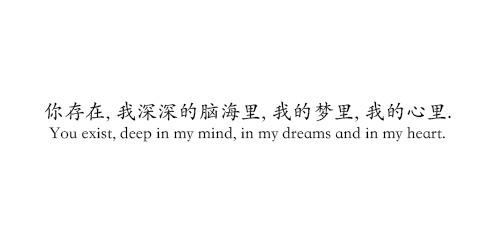

In [0]:
from IPython.display import Image
Image(test_dir+"eng_chi_quote_md.jpg")

In [0]:
parsed_jpg = parser.from_file(test_dir+"eng_chi_quote_md.jpg", headers={"X-Tika-OCRLanguage":"eng+chi_sim"})
parsed_jpg

{'content': '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n你 存在 , 我 深 深 的 脑海 里 , 我 的 梦 里 , 我 的 心里 .\n\nYou exist, deep in my mind, in my dreams and in my heart.\n\n',
 'metadata': {'Color Transform': 'YCbCr',
  'Component 1': 'Y component: Quantization table 0, Sampling factors 1 horiz/1 vert',
  'Component 2': 'Cb component: Quantization table 1, Sampling factors 1 horiz/1 vert',
  'Component 3': 'Cr component: Quantization table 1, Sampling factors 1 horiz/1 vert',
  'Compression Type': 'Baseline',
  'Content-Type': 'image/jpeg',
  'DCT Encode Version': '25600',
  'Data Precision': '8 bits',
  'File Modified Date': 'Fri May 15 06:03:02 +00:00 2020',
  'File Name': 'apache-tika-10987941243315793491.tmp',
  'File Size': '18213 bytes',
  'Flags 0': '192',
  'Flags 1': '0',
  'Image Height': '250 pixels',
  'Image Width': '500 pixels',
  'Number of Components': '3',
  'Number of Tables': '4 Huffman tables',
  'Quality': '100',
  'X-Parsed-By': ['org.apache.tika.parser.Def

In [0]:
print(parsed_jpg["content"].replace("\n\n", "\n"))

















你 存在 , 我 深 深 的 脑海 里 , 我 的 梦 里 , 我 的 心里 .
You exist, deep in my mind, in my dreams and in my heart.



### 2. slanted text

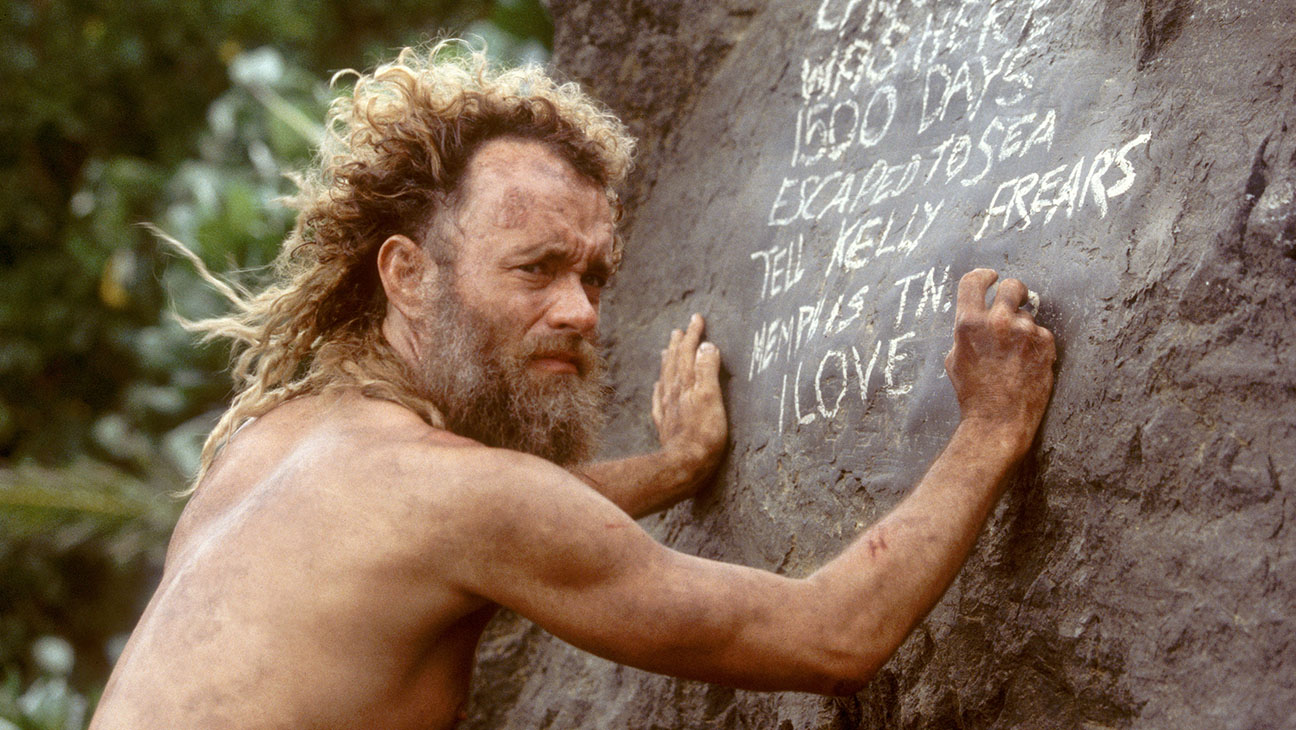

In [0]:
from IPython.display import Image
Image(test_dir+"slanted_text_in_image_castaway.jpg")

In [0]:
parsed_png = parser.from_file(test_dir+"slanted_text_in_image_castaway.jpg")
print(parsed_png["content"])

None


In [0]:
parsed_png

{'content': None,
 'metadata': {'Application Record Version': '2',
  'Caption Digest': '56 18 175 28 122 83 209 33 54 110 221 100 122 73 37 8',
  'Caption Writer/Editor': 'DD',
  'Caption/Abstract': 'Cast Away (2000)\rDirected by Robert Zemeckis\rShown: Tom Hanks (as Chuck Noland)',
  'Coded Character Set': 'UTF-8',
  'Color Halftoning Information': '[72 values]',
  'Color Transfer Functions': '[112 values]',
  'Color Transform': 'YCbCr',
  'Component 1': 'Y component: Quantization table 0, Sampling factors 1 horiz/1 vert',
  'Component 2': 'Cb component: Quantization table 1, Sampling factors 1 horiz/1 vert',
  'Component 3': 'Cr component: Quantization table 1, Sampling factors 1 horiz/1 vert',
  'Compression Type': 'Baseline',
  'Content-Type': 'image/jpeg',
  'Copyright Notice': '© DreamWorks SKG',
  'Creation-Date': '2016-07-08T17:47:06',
  'Credit': 'DreamWorks SKG/Photofest',
  'DCT Encode Version': '25600',
  'Data Precision': '8 bits',
  'Exif IFD0:Bits Per Sample': '8 8 8 bit

### png file

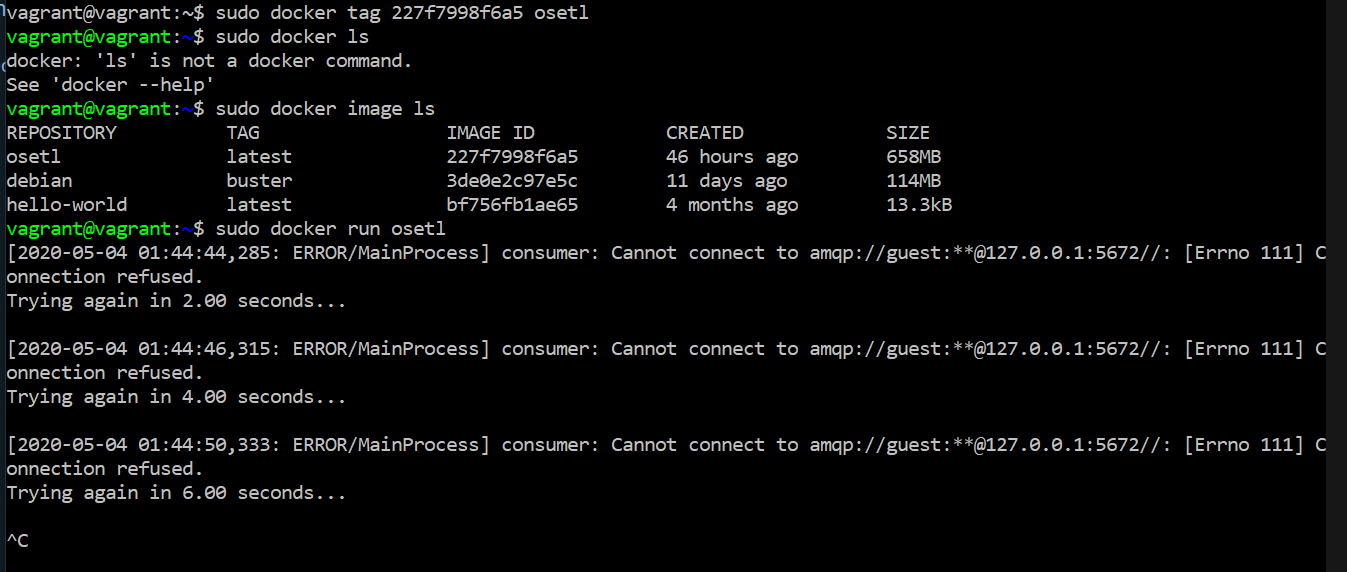

In [0]:
from IPython.display import Image
Image(test_dir+"cmd_display.png")

In [0]:
parsed_png = parser.from_file(test_dir+"cmd_display.png")
parsed_png

{'content': "\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nlvagrant@vagrant:~$ sudo docker tag 227f7998f6a5 osetl\nvagrant@vagrant:~$ sudo docker 1s\n\n(docker: '1ls' is not a docker command.\n\nSee ‘docker --help'\n\nvagrant@vagrant:~$ sudo docker image 1s\n\nREPOSITORY TAG IMAGE ID fei)\n\nosetl latest 227F7998f6a5 46 hours ago\nfe losi-1a) buster 3de@e2c97e5c 11 days ago\nhello-world latest Lon Aes-y ot E-\\1-1Y 4 months ago\n\nvagrant@vagrant:~$ sudo docker run osetl\n\n[2020-@5-@4 @1:44:44,285: ERROR/MainProcess] consumer: Cannot connect to\nonnection refused.\n\nTrying again in 2.0@ seconds...\n\n[2020-@5-@4 @1:44:46,315: ERROR/MainProcess] consumer: Cannot connect to\nonnection refused.\nTrying again in 4.00 seconds...\n\n[2020-@5-@4 @1:44:5@,333: ERROR/MainProcess] consumer: Cannot connect to\nonnection refused.\nTrying again in 6.0@ seconds...\n\naC\n\nSIZE\nssi 3)\nee)\nbere)\n\namgp: //guest : **@127.0.0.1:5672//: [Errno 111] C\n\namgp: //guest : **@127.0.0.1:5672//:

In [0]:
print(parsed_png["content"])




























lvagrant@vagrant:~$ sudo docker tag 227f7998f6a5 osetl
vagrant@vagrant:~$ sudo docker 1s

(docker: '1ls' is not a docker command.

See ‘docker --help'

vagrant@vagrant:~$ sudo docker image 1s

REPOSITORY TAG IMAGE ID fei)

osetl latest 227F7998f6a5 46 hours ago
fe losi-1a) buster 3de@e2c97e5c 11 days ago
hello-world latest Lon Aes-y ot E-\1-1Y 4 months ago

vagrant@vagrant:~$ sudo docker run osetl

[2020-@5-@4 @1:44:44,285: ERROR/MainProcess] consumer: Cannot connect to
onnection refused.

Trying again in 2.0@ seconds...

[2020-@5-@4 @1:44:46,315: ERROR/MainProcess] consumer: Cannot connect to
onnection refused.
Trying again in 4.00 seconds...

[2020-@5-@4 @1:44:5@,333: ERROR/MainProcess] consumer: Cannot connect to
onnection refused.
Trying again in 6.0@ seconds...

aC

SIZE
ssi 3)
ee)
bere)

amgp: //guest : **@127.0.0.1:5672//: [Errno 111] C

amgp: //guest : **@127.0.0.1:5672//: [Errno 111] C

amgp: //guest : **@127.0.0.1:5672//: [Errno 111] C




## D. .docx file with inline image

In [0]:
parsed_docx = parser.from_file(test_dir+"calendar_with_image.docx", headers={"X-Tika-OCRLanguage":"eng+chi_sim"})
parsed_docx

{'content': '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\tMay\n\n\t2020\n\n\tSubtitle\n\n\tTitle\nTo get started right away, just click any placeholder text (such as this) and start typing to replace it with your own. Want to insert a picture from your files or add a shape? You got it! On the Insert tab of the ribbon, just tap the option you need.\n\n\t\n\n\n\tSunday\tMonday\n\tTuesday\n\tWednesday\n\tThursday\n\tFriday\n\tSaturday\n\n\t\n\t\n\t\n\t\n\t\n\t1\n\t2\n\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t3\n\t4\n\t5\n\t6\n\t7\n\t8\n\t9\n\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t10\n\t11\n\t12\n\t13\n\t14\n\t15\n\t16\n\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t17\n\t18\n\t19\n\t20\n\t21\n\t22\n\t23\n\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t24\n\t25\n\t26\n\t27\n\t28\n\t29\n\t30\n\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t31\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\nView and edit this document in Word on your computer, tablet, or phone. You can edit text; easily ins

In [0]:
print(parsed_docx["content"])













































	May

	2020

	Subtitle

	Title
To get started right away, just click any placeholder text (such as this) and start typing to replace it with your own. Want to insert a picture from your files or add a shape? You got it! On the Insert tab of the ribbon, just tap the option you need.

	


	Sunday	Monday
	Tuesday
	Wednesday
	Thursday
	Friday
	Saturday

	
	
	
	
	
	1
	2

	
	
	
	
	
	
	

	3
	4
	5
	6
	7
	8
	9

	
	
	
	
	
	
	

	10
	11
	12
	13
	14
	15
	16

	
	
	
	
	
	
	

	17
	18
	19
	20
	21
	22
	23

	
	
	
	
	
	
	

	24
	25
	26
	27
	28
	29
	30

	
	
	
	
	
	
	

	31
	
	
	
	
	
	

	
	
	
	
	
	
	


View and edit this document in Word on your computer, tablet, or phone. You can edit text; easily insert content such as pictures, shapes, and tables; and seamlessly save the document to the cloud from Word on your Windows, Mac, Android, or iOS device.



## E. TIF

In [0]:
parsed_tif = parser.from_file(test_dir+"contract.TIF", headers={"X-Tika-OCRLanguage":"eng+chi_sim"})
parsed_tif

{'content': '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nTHE SLEREXE COMPANY LIMITED\n\nSAPORS LANE -. BOOLE - DORSET - BH25 8ER\nTELEPHONE BOOLE (94513) 51617 - TELEX 123456\n\nOur Ref. 350/PJC/EAC 18th January, 1972.\n\nDr. P.N. Cundall,\nMining Surveys Ltd.,\nHolroyd Road,\nReading,\n\nBerks.\n\nDear Pete,\n\nPermit me to introduce you to the facility of facsimile\ntransmission.\n\nIn facsimile a photocell is caused to perform a raster scan over\nthe subject copy. The variations of print density on the document\ncause the photocell to generate an analogous electrical video signal.\nThis signal is used to modulate a carrier, which is transmitted to a\nremote destination over a radio or cable communications link.\n\nAt the remote terminal, demodulation reconstructs the video\nsignal, which is used to modulate the density of print produced by a\nprinting device. This device is scanning in a raster scan synchronised\nwith that at the transmitting termin

In [0]:
print(parsed_tif["content"])








































THE SLEREXE COMPANY LIMITED

SAPORS LANE -. BOOLE - DORSET - BH25 8ER
TELEPHONE BOOLE (94513) 51617 - TELEX 123456

Our Ref. 350/PJC/EAC 18th January, 1972.

Dr. P.N. Cundall,
Mining Surveys Ltd.,
Holroyd Road,
Reading,

Berks.

Dear Pete,

Permit me to introduce you to the facility of facsimile
transmission.

In facsimile a photocell is caused to perform a raster scan over
the subject copy. The variations of print density on the document
cause the photocell to generate an analogous electrical video signal.
This signal is used to modulate a carrier, which is transmitted to a
remote destination over a radio or cable communications link.

At the remote terminal, demodulation reconstructs the video
signal, which is used to modulate the density of print produced by a
printing device. This device is scanning in a raster scan synchronised
with that at the transmitting terminal. As a result, a facsimile
copy of the subject document is produced.

Probably

# Table manual Extract

In [0]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import csv
import glob
import os
import re
import sys
import pandas as pd
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
# pd.options.display.mpl_style = 'default'

from tika import parser

# input_path = sys.argv[1]

In [0]:
def create_df(pdf_content, content_pattern, line_pattern, column_headings):
    """Create a Pandas DataFrame from lines of text in a PDF.

    Arguments:
    pdf_content -- all of the text Tika parses from the PDF
    content_pattern -- a pattern that identifies the set of lines
    that will become rows in the DataFrame
    line_pattern -- a pattern that separates the agency name or revenue source
    from the dollar values in the line
    column_headings -- the list of column headings for the DataFrame
    """
    list_of_line_items = []
    # Grab all of the lines of text that match the pattern in content_pattern
    content_match = re.search(content_pattern, pdf_content, re.DOTALL)
    # group(1): only keep the lines between the parentheses in the pattern
    content_match = content_match.group(1)
    # Split on newlines to create a sequence of strings
    content_match = content_match.split('\n')
    # Iterate over each line
    for item in content_match:
        # Create a list to hold the values in the line we want to retain
        line_items = []
        # Use line_pattern to separate the agency name or revenue source
        # from the dollar values in the line
        line_match = re.search(line_pattern, item, re.I)
        # Grab the agency name or revenue source, strip whitespace, and remove commas
        # group(1): the value inside the first set of parentheses in line_pattern
        agency = line_match.group(1).strip().replace(',', '')
        # Grab the dollar values, strip whitespace, replace dashes with 0.0, and remove $s and commas
        # group(2): the value inside the second set of parentheses in line_pattern
        values_string = line_match.group(2).strip().\
        replace('- ', '0.0 ').replace('$', '').replace(',', '')
        # Split on whitespace and convert to float to create a sequence of floating-point numbers
        values = map(float, values_string.split())
        # Append the agency name or revenue source into line_items
        line_items.append(agency)
        # Extend the floating-point numbers into line_items so line_items remains one list
        line_items.extend(values)
        # Append line_item's values into list_of_line_items to generate a list of lists;
        # all of the lines that will become rows in the DataFrame
        list_of_line_items.append(line_items)
    # Convert the list of lists into a Pandas DataFrame and specify the column headings
    df = pd.DataFrame(list_of_line_items, columns=column_headings)
    return df

In [0]:
def create_plot(df, column_to_sort, x_val, y_val, type_of_plot, plot_size, the_title):
    """Create a plot from data in a Pandas DataFrame.

    Arguments:
    df -- A Pandas DataFrame
    column_to_sort -- The column of values to sort
    x_val -- The variable displayed on the x-axis
    y_val -- The variable displayed on the y-axis
    type_of_plot -- A string that specifies the type of plot to create
    plot_size -- A list of 2 numbers that specifies the plot's size
    the_title -- A string to serve as the plot's title
    """
    # Create a figure and an axis for the plot
    fig, ax = plt.subplots()
    # Sort the values in the column_to_sort column in the DataFrame
    df = df.sort_values(by=column_to_sort)
    # Create a plot with x_val on the x-axis and y_val on the y-axis
    # type_of_plot specifies the type of plot to create, plot_size
    # specifies the size of the plot, and the_title specifies the title
    df.plot(ax=ax, x=x_val, y=y_val, kind=type_of_plot, figsize=plot_size, title=the_title)
    # Adjust the plot's parameters so everything fits in the figure area
    plt.tight_layout()
    # Create a PNG filename based on the plot's title, replace spaces with underscores
    pngfile = the_title.replace(' ', '_') + '.png'
    # Save the plot in the current folder
    plt.savefig(pngfile)

In [0]:
# In the Expenditures table, grab all of the lines between Totals and General Government
expenditures_pattern = r'Totals\n+(Legislative, Judicial, Executive.*?)\nGeneral Government:'

# In the Revenues table, grab all of the lines between 2015-16 and either Subtotal or Total
revenues_pattern = r'\d{4}-\d{2}\n(Personal Income Tax.*?)\n +[Subtotal|Total]'


# For the expenditures, grab the agency name in the first set of parentheses
# and grab the dollar values in the second set of parentheses
expense_pattern = r'(K-12 Education|[a-z,& -]+)([$,0-9 -]+)'

# For the revenues, grab the revenue source in the first set of parentheses
# and grab the dollar values in the second set of parentheses
revenue_pattern = r'([a-z, ]+)([$,0-9 -]+)'

# Column headings for the Expenditures DataFrames
expense_columns = ['Agency', 'General', 'Special', 'Bond', 'Totals']

# Column headings for the Revenues DataFrames
revenue_columns = ['Source', 'General', 'Special', 'Total', 'Change']

In [0]:
for input_file in glob.glob(os.path.join("/content/pdf/", '*.pdf')):
    # Grab the PDF's file name
    print(input_file)
    filename = os.path.basename(input_file)
    print(filename)

/content/pdf/sample.pdf
sample.pdf


In [0]:
# Iterate over all PDF files in the folder and process each one in turn
for input_file in glob.glob(os.path.join("/content/pdf", '*.pdf')):
    # Grab the PDF's file name
    filename = os.path.basename(input_file)
    print(filename)
    # Remove .pdf from the filename so we can use it as the name of the plot and PNG
    plotname = filename.strip('.pdf')

    # Use Tika to parse the PDF
    parsedPDF = parser.from_file(input_file)
    # Extract the text content from the parsed PDF
    pdf = parsedPDF["content"]
    # Convert double newlines into single newlines
    pdf = pdf.replace('\n\n', '\n')

    # Create a Pandas DataFrame from the lines of text in the Expenditures table in the PDF
    expense_df = create_df(pdf, expenditures_pattern, expense_pattern, expense_columns)
    # Create a Pandas DataFrame from the lines of text in the Revenues table in the PDF
    revenue_df = create_df(pdf, revenues_pattern, revenue_pattern, revenue_columns)
    # print(expense_df)
    # print(revenue_df)

    # Print the total expenditures and total revenues in the budget to the screen
    print("Total Expenditures: {}".format(expense_df["Totals"].sum()))
    print("Total Revenues: {}\n".format(revenue_df["Total"].sum()))

    # Create and save a horizontal bar plot based on the data in the Expenditures table
    create_plot(expense_df, "Totals", "Agency", "Totals", 'barh', [20,10], \
    plotname+"Expenditures")
    # Create and save a horizontal bar plot based on the data in the Revenues table
    create_plot(revenue_df, "Total", "Source", "Total", 'barh', [20,10], \
    plotname+"Revenues")

sample.pdf
Total Expenditures: 160641.0
Total Revenues: 162553.0

